In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!gdown --id 1hSRdxYFZ8iYJrQObe2anFNQn-3sm0Zio

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1hSRdxYFZ8iYJrQObe2anFNQn-3sm0Zio
To: /content/clean_iris.csv
100% 3.79k/3.79k [00:00<00:00, 10.4MB/s]


In [ ]:
df = pd.read_csv('/content/clean_iris.csv')
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

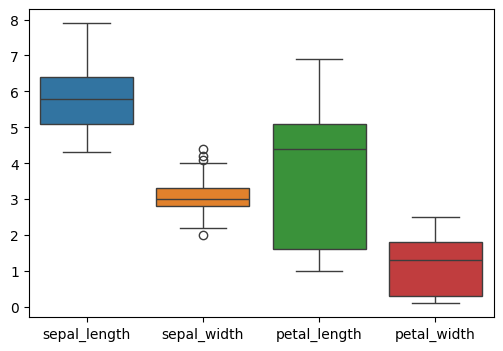

In [ ]:
#check outliers data
plt.figure(figsize=(6, 4))
sns.boxplot(data=df)
plt.show()

In [ ]:
#fix outliers
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers_iqr(df, 'sepal_width')

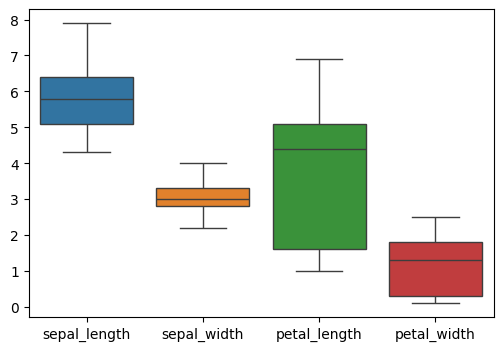

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df)
plt.show()

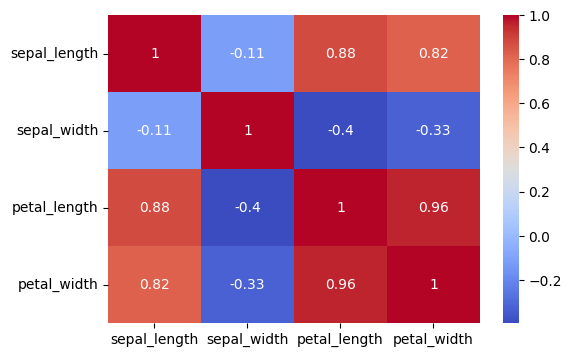

In [ ]:
#check correlation between variabel
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

correlation between petal_length & sepal_length is 0.88. we can use thats variabel for regression analysis

#Regression Analysis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

In [ ]:
x = df[['sepal_length']]
y = df['petal_length']
#split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#train model using linear regression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
#result predict data from model
yhat = model.predict(x_test)
yhat[:4]

array([4.61397628, 2.94447998, 3.31547916, 4.61397628])

In [ ]:
#evaluate model
print('R2 Score:', r2_score(y_test, yhat))
print('MSE:', mean_squared_error(y_test, yhat))

R2 Score: 0.6729793767904323
MSE: 0.8638088390429564


In [ ]:
#see coef & intercept
print('Coef:', model.coef_)
print('Intercept:', model.intercept_)

Coef: [1.85499589]
Intercept: -7.072497810800048


#Time Series Analysis

In [ ]:
!gdown --id 1HQQa-fPovsiaRwML9V-A6_35x0xdATyz

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1HQQa-fPovsiaRwML9V-A6_35x0xdATyz
To: /content/2) Stock Prices Data Set.csv
100% 24.2M/24.2M [00:00<00:00, 76.2MB/s]


In [ ]:
df_stock = pd.read_csv('/content/2) Stock Prices Data Set.csv')
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB


In [ ]:
df_stock['date'] = pd.to_datetime(df_stock['date'])
df_stock.sort_values('date')

symbol       date    open    high      low   close   volume
0         AAL 2014-01-02   25.07   25.82   25.060   25.36  8998943
330      NVDA 2014-01-02   15.92   15.98   15.720   15.86  6502296
329       NUE 2014-01-02   53.29   53.38   52.510   52.73  1611326
328      NTRS 2014-01-02   61.76   61.95   60.665   60.89  1011050
327      NTAP 2014-01-02   41.01   41.01   40.415   40.42  2427140
...       ...        ...     ...     ...      ...     ...      ...
497128    EMR 2017-12-29   70.04   70.21   69.690   69.69  1848874
497127    EMN 2017-12-29   93.71   93.76   92.550   92.64   632351
497126     EL 2017-12-29  127.80  128.13  127.200  127.24   805149
497139   EVHC 2017-12-29   34.70   35.09   34.530   34.56  1471045
497471    ZTS 2017-12-29   72.55   72.76   72.040   72.04  1704122

[497472 rows x 7 columns]

In [ ]:
print('duplicate: ', df_stock.duplicated().sum())

duplicate:  0


In [ ]:
df_stock.isna().sum()

symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

In [ ]:
df_stock['open'].fillna(df_stock['open'].mean(), inplace=True)
df_stock['high'].fillna(df_stock['high'].mean(), inplace=True)
df_stock['low'].fillna(df_stock['low'].mean(), inplace=True)

<ipython-input-88-aa161d555ae1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_stock['open'].fillna(df_stock['open'].mean(), inplace=True)
<ipython-input-88-aa161d555ae1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
df_stock.isna().sum()

symbol    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [ ]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   symbol  497472 non-null  object        
 1   date    497472 non-null  datetime64[ns]
 2   open    497472 non-null  float64       
 3   high    497472 non-null  float64       
 4   low     497472 non-null  float64       
 5   close   497472 non-null  float64       
 6   volume  497472 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 26.6+ MB


In [ ]:
df_stock.set_index('date', inplace=True)

In [ ]:
df_stock = df_stock[~df_stock.index.duplicated(keep='first')]

<ipython-input-96-8ba6b0033a79>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


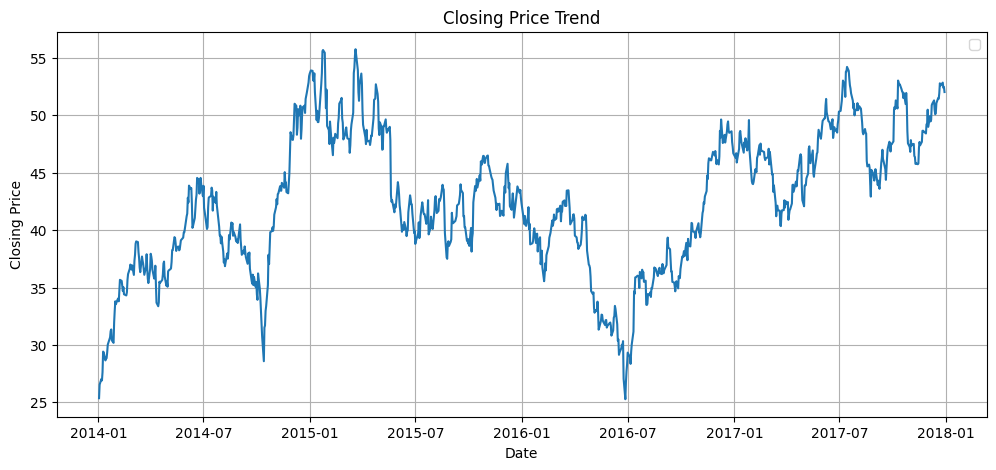

In [ ]:
#see close price trend
plt.figure(figsize=(12, 5))
plt.plot(df_stock['close'])
plt.title("Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)
plt.show()

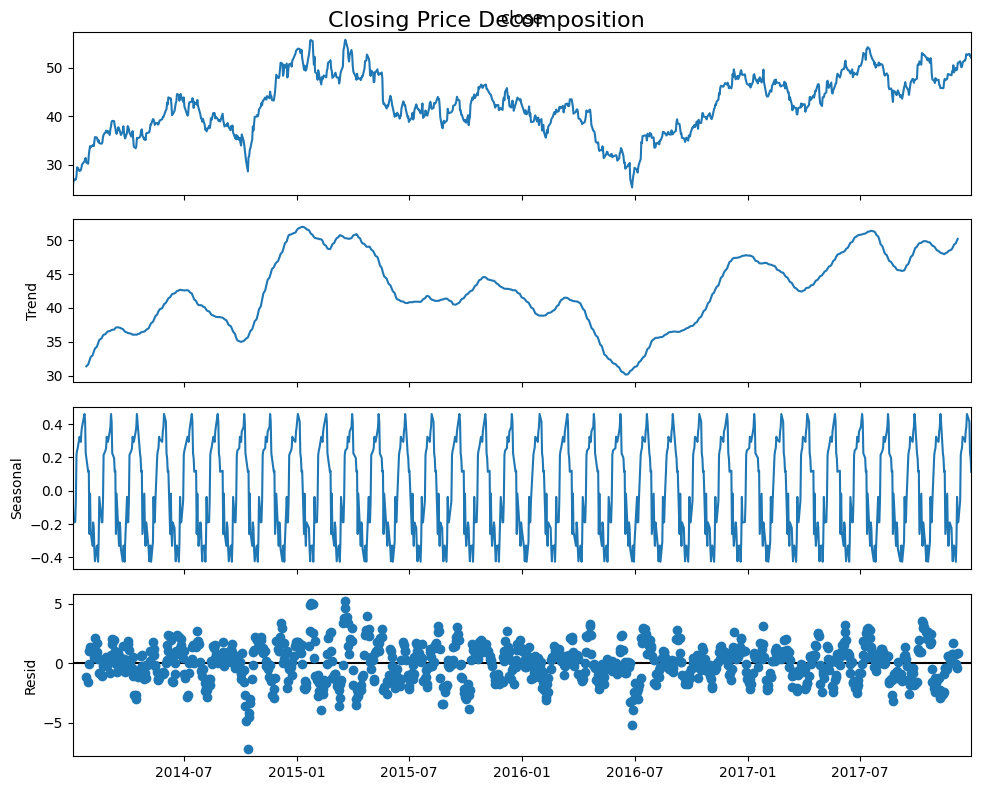

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_result = seasonal_decompose(df_stock['close'], model='additive', period=30)
plt.rcParams.update({'figure.figsize': (10, 8)})
df_result.plot()
plt.suptitle('Closing Price Decomposition', fontsize=16)
plt.show()


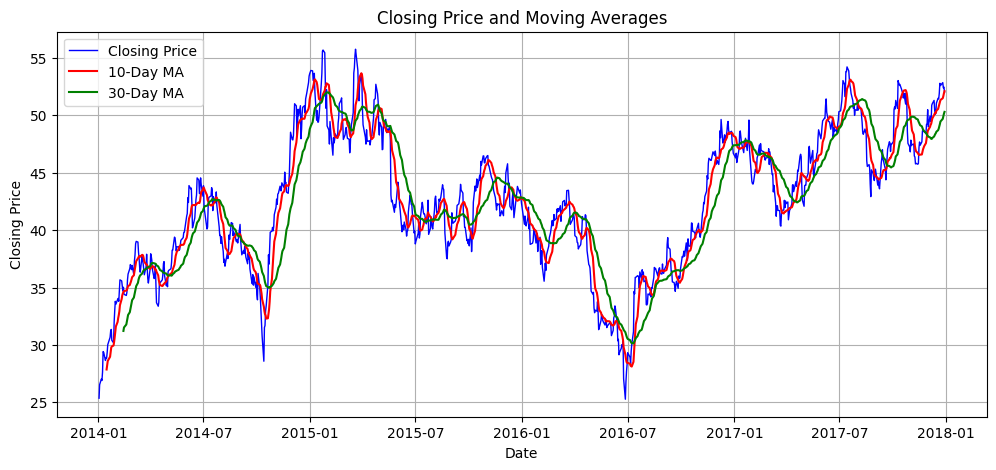

In [ ]:
df_stock['MA_10'] = df_stock['close'].rolling(window=10).mean()
df_stock['MA_30'] = df_stock['close'].rolling(window=30).mean()

plt.figure(figsize=(12, 5))
plt.plot(df_stock['close'], label='Closing Price', color='blue', linewidth=1)
plt.plot(df_stock['MA_10'], label='10-Day MA', color='red', linewidth=1.5)
plt.plot(df_stock['MA_30'], label='30-Day MA', color='green', linewidth=1.5)
plt.title("Closing Price and Moving Averages")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)
plt.show()

#Clustering Analysis

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
#choose features for clustering
x = df[['sepal_length', 'petal_length']]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

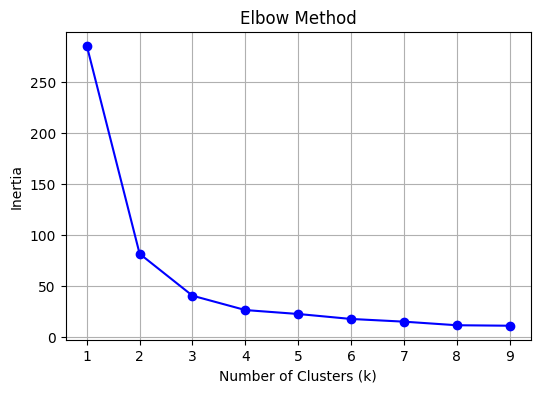

In [ ]:
#find k as cluster using Elbow Method with range 1-10
inertia = []
k_range = range(1,10)
for k in k_range:
  model = KMeans(n_clusters=k, random_state=0)
  model.fit(x_scaled)
  inertia.append(model.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

k = 3 will use as a cluster because the graphics result finds thats suitable clustering

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(x_scaled)

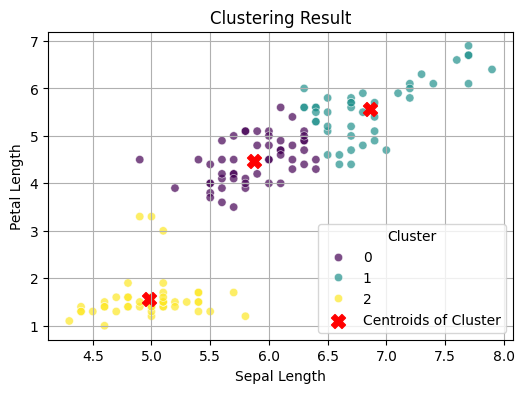

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='sepal_length', y='petal_length', hue='cluster', palette='viridis', alpha=0.7)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:,0],centroids[:,1], marker='X', s=100,color='red', label='Centroids of Cluster')
plt.title('Clustering Result')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_stock.reset_index(inplace=True)

In [ ]:
#df.to_csv('/content/drive/MyDrive/Codveda Technologies/clustering_analysis.csv', index=False)
df_stock.to_csv('/content/drive/MyDrive/Codveda Technologies/time_series_analysis.csv', index=False)